#SVD and Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries you might need

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc


we will use seed dataset : https://archive.ics.uci.edu/ml/datasets/seeds

You can download it from : https://archive.ics.uci.edu/ml/machine-learning-databases/00236/

In [ ]:
# preparing the dataset
path = '/content/drive/MyDrive/seeds_dataset.txt'# path to seeds_dataset.txt

df = pd.read_csv(path,delimiter ='\t', header = None)
df = df.rename(columns = {7:'label'})
x = df.drop(['label'],axis = 1)
y = df['label']
x # you will be transforming this data with svd

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


## Part 1 -  Applying Truncated SVD on the dataset. [ 2 marks ]

Use Truncated SVD to reduce dimensionality of x. You can use [sklearn's TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

You can use ``` explained_variance_ratio_ ``` attribute of ```sklearn.decomposition.TruncatedSVD``` to make sure the number of final components after data transformation explain at least 80% of the variance.

In [ ]:
# your code to transform the data using svd
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=1)
svd.fit(x)

TruncatedSVD(n_iter=7, random_state=1)

In [ ]:
print(svd.explained_variance_ratio_.sum())

0.9274486806343492


In [ ]:
x_s = svd.fit_transform(x)
x_s.shape

(210, 2)

## Part 2 -  Use K-Means to cluster the data [ 3 marks ]

Note: Use the data transformed using SVD

### a. Use Elbow method to find the right number of clusters. Include a plot and justify you choice. 

Elbow method, among many, can be used in clustering to find the optimal number of clusters. You can read more about Elbow method [here](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) and you can implement the Elbow method in any way ( i.e. you can choose any scoring parameter. There are some implementations which use Within-Cluster Sum of Square while some use variance explained). One of the implementation that you can use can be found [here](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html). You can try clusters ranging from 1 to 10 to find the right number of clusters. Please plot the used scoring parameter for different number of clusters and then explain why you decided on a certain number of clusters. 

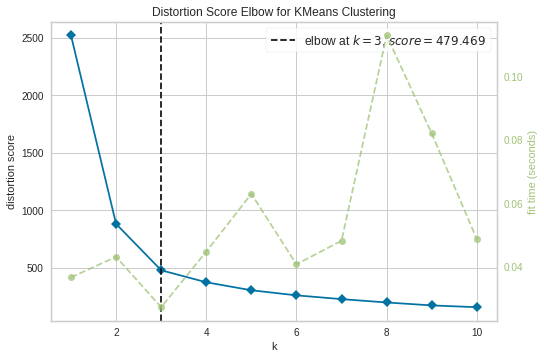

In [ ]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(x_s)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Answer - Based on the manual, the scorin point is set to be distortion score, which computes the sum of squared distances from each point to its assigned center.
We will choose the nimber of clusters to be 3. As it could be seen from the plot, the slop remains the same after k=3, but before that, the score has fallen massively by increasing the number of clusters.

### b. Use kmeans to cluster the data. 

You can use [sklearn's implementation of kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

In [ ]:
x_kmeans = KMeans(n_clusters=3, random_state=0).fit(x_s)

### c. Visualize the clusters.

Note - You may use [matplotlib's scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html/) and its 'c' argument to visualize different clusters. The predicted clusters using kmeans can be used as labels and then plotted using a scatterplot. You can use something [like this](https://www.folkstalk.com/tech/how-to-plot-a-single-cluster-with-code-examples/) to plot the desired number of clusters. 

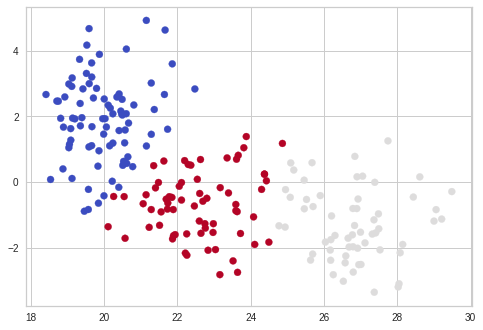

In [ ]:
plt.scatter(x_s[:, 0], x_s[:, 1], c = x_kmeans.labels_, cmap = 'coolwarm')

## Part 3 -  Use Agglomerative Hierarchical Clustering to cluster the data [ 3 marks ]

For Agglomerative hierarchichal clustering, you can use [Scipy's implementation](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) or [Sklearn's implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). i.e. you can either use ```scipy.cluster.hierarchy ```
or ``` sklearn.cluster.AgglomerativeClustering```


 We recommend to use Scipy for both dendogram and the agglomerative clustering. However, you can use any library.

### a. Use Dendogram to find the right number of clusters. Justify your choice. 

Use a [Dendogram](https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8) to decide the optimal number of clusters. Also explain why you decided on a certain number. 

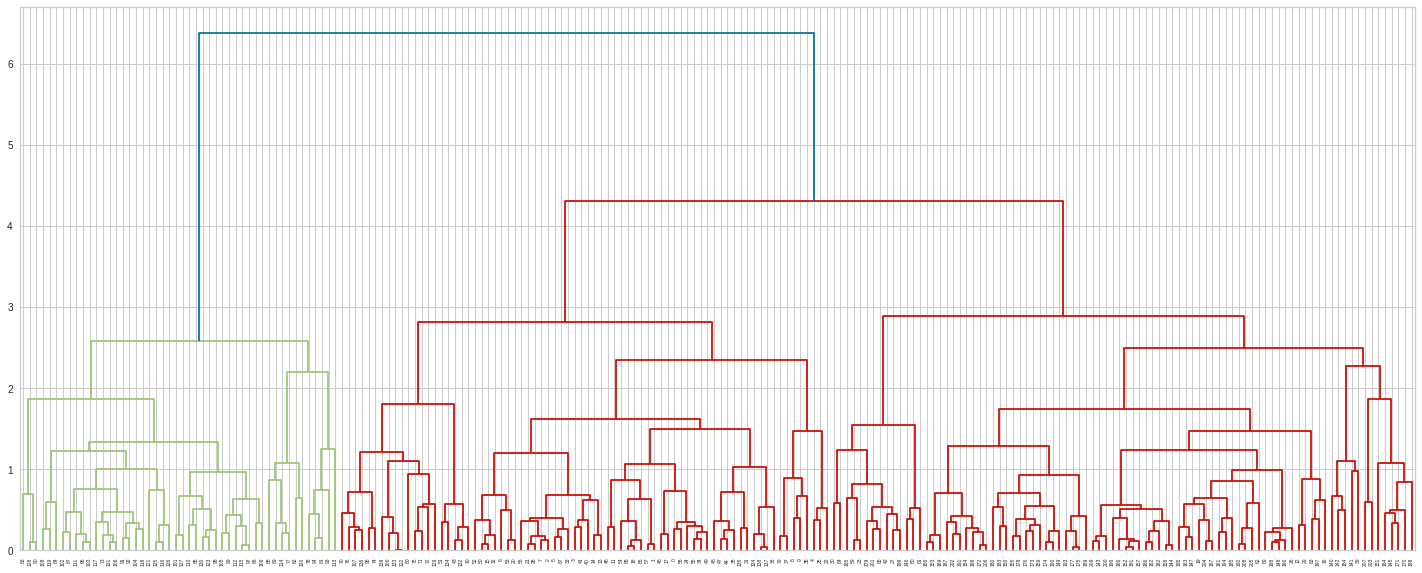

In [ ]:
Z = shc.linkage(x_s, method='average', metric='euclidean', optimal_ordering=True)
fig = plt.figure(figsize=(25, 10))
dn = shc.dendrogram(Z)
plt.show()

Answer - Regarding this plot, we can see that an optimal number for the clusters number could be k=3. Below that line, the vertical lines are very short and the clusters will be much closer together, which might not be optimal.

###  b. Cluster the data

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(x_s)

### c. Visualize the clusters

Use the same method as in (ii) c to visualise the predicted clusters.

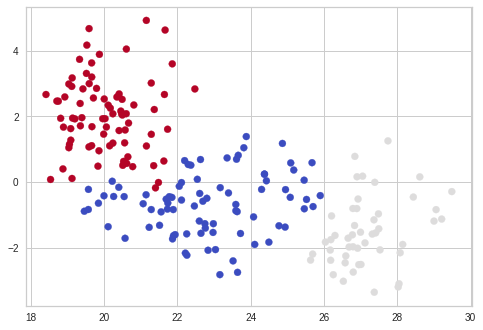

In [ ]:
plt.scatter(x_s[:, 0], x_s[:, 1], c = clustering.labels_, cmap = 'coolwarm')

## Part 4 -   Consider the [DBSCAN algorithm](https://en.wikipedia.org/wiki/DBSCAN). In which situation would you prefer DBSCAN over the two algorithms discussed above? [ 2 mark ]

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1.25, min_samples=30).fit(x_s)

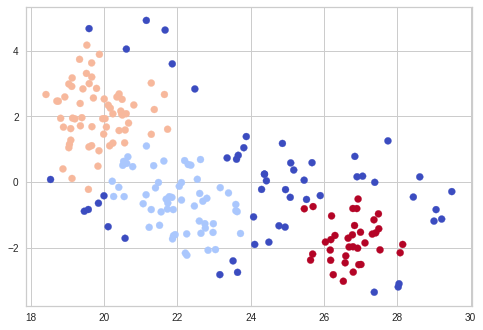

In [ ]:
plt.scatter(x_s[:, 0], x_s[:, 1], c = clustering.labels_, cmap = 'coolwarm')

Answer - The DBSCAN algorithm could be used in cases with noisy data, or outliers (which can cause problem for the previous methods). Also, in cases where we don't know the number of clusters in priori, DBSCAN could help us. Moreover, it can find arbitrarily-shaped clusters. However, we should have information on the data and its scale to set the parameters. Also, for high-dimensional data, choosing an epsilon is hard.

